# Sales Analysis

In [30]:
# Import pandas and os libraries
import pandas as pd
import os

### Merging 12 months sales data into single file 

In [31]:
# Load csv files
df = pd.read_csv("C:/Users/91898/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir(r"C:\Users\91898\Downloads\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]

for file in files:
    print(file)
    


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [32]:
# load multiple csv file into one file
files = [file for file in os.listdir(r"C:\Users\91898\Downloads\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("C:/Users/91898/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_data_.csv", index = False)



### read in updated dataframe


In [33]:
all_data = pd.read_csv(r"C:\Users\91898\Downloads\Pandas-Data-Science-Tasks-master\all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Task 1 : Clean up the data

### drop rows of NAN

In [34]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [41]:
# make nan_df to find NaN value in all_data
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [42]:
# drop NAN in all_data

all_data = all_data.dropna(how = 'all')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## find 'Or' and delete it

In [43]:
# make temp_df variable for find 'Or' in 'Order Date'
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [44]:
## we dont want to Or in order date so we can change variable name to all_data
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Convert column to the correct type

In [45]:
# change data type of 'Quantity Ordered' and 'Price Each'
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # convert to integer
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])# convert to float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Augment data with some additional column

## task 2 : Add month column

In [46]:
# Get Month from 'Order Date' with use of slicing and covert into integer data type
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Task 3 : add sales column

In [47]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Task 4 : Add city column


In [48]:
# Add city column
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

# code 1 
#all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ', ' + get_state(x))

# code 2
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


## Question 1 : What was the best month for sale? How much earned that month?

In [64]:
result = all_data.groupby('Month').sum() 
result.head(13)
# Sales in the 12th month (December) were the highest, amounting to $4,613,443.

,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
1,10903,1811768.38,1822256.73,139485,282440
2,13449,2188884.72,2202022.42,172669,354885
3,17005,2791207.83,2807100.38,218969,447559
4,20558,3367671.02,3390670.24,262259,544186
5,18667,3135125.13,3152606.75,238780,487899
6,15253,2562025.61,2577802.26,195528,402436
7,16072,2632539.56,2647775.76,206169,417349
8,13448,2230345.42,2244467.88,172289,353857
9,13109,2084992.09,2097560.13,168513,341698


### Analysis with visualization 

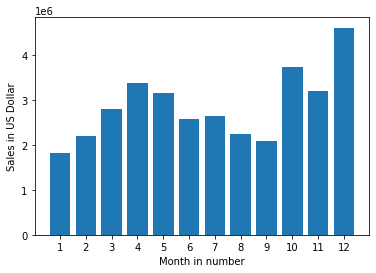

In [65]:
# for Visualization, Import matplotlib library
import matplotlib.pyplot as plt

months = range(1,13)
    
plt.bar(months, result['Sales'])
plt.xticks(months)
plt.xlabel('Month in number')
plt.ylabel('Sales in US Dollar')
plt.show()
# Sales in the 12th month (December) were the highest, amounting to $4,613,443.

## Qustion 2 : Which city had highest number of sale?


In [66]:
# Group data by 'City' and calculate the sum for numeric columns
results = all_data.groupby('City').sum()
all_data.head()
results

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58,214264,442932
Austin (TX),11153,1809873.61,69829,1819581.75,141946,289060
Boston (MA),22528,3637409.77,141112,3661642.01,288225,590442
Dallas (TX),16730,2752627.82,104620,2767975.40,214390,435155
Los Angeles (CA),33289,5421435.23,208325,5452570.80,427444,866638
New York City (NY),27932,4635370.83,175741,4664317.43,357696,733598
Portland (ME),2750,447189.25,17144,449758.27,35211,72856
Portland (OR),11303,1860558.22,70621,1870732.34,144421,295533
San Francisco (CA),50239,8211461.74,315520,8262203.91,643265,1319477


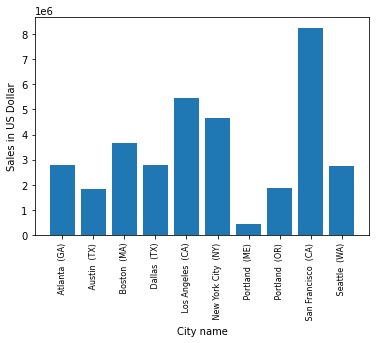

In [67]:
# Make visualization
import matplotlib.pyplot as plt

# for this code cities are not in order because of unique
# cities = all_data['City'].unique()
# for right order for city we have to use 2 parameter into this code
cities = [city for city, df in all_data.groupby('City')]
    
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.xlabel('City name')
plt.ylabel('Sales in US Dollar')
plt.show()
# San Francisco (CA) has highest number of sale city.

## Question 3 : what time should we display advertisements to maximise the likelyhood of customer's buying product?

In [68]:
all_data.head()
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) # convert Order Date to datetime type 

In [54]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [69]:
# once column converted into date column we can access dt and hour
all_data['Hour'] = all_data['Order Date'].dt.hour  
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


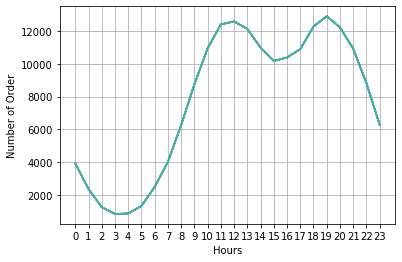

In [56]:
# make Visualization
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Order')
plt.show()
# plot display 11am (11)  and 7pm (19) are the best hour to put advertisements to maximise the likelyhood of customer's buying product.

## Question 4 : What Product sold the most? why do you think it sold the most?


In [57]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


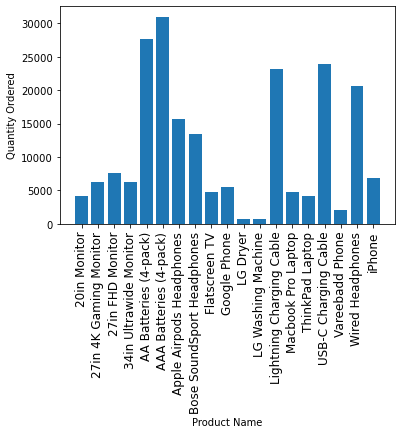

In [70]:
# Grouping the 'all_data' DataFrame by the 'Product' column
product_group = all_data.groupby('Product')
product_group.sum()

# Calculating the sum for each product group and retrieving the 'Quantity Ordered' column
quantity_ordered = product_group.sum()['Quantity Ordered']

# Extracting the product names as a list for the x-axis labels
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 12)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product Name')
plt.show()


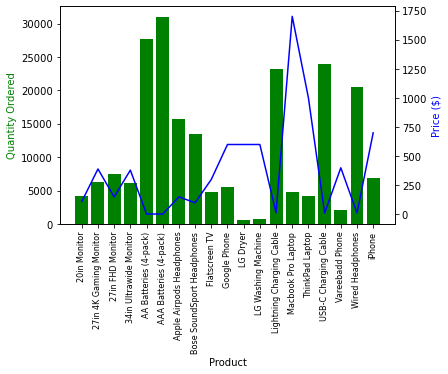

In [71]:
# Calculating the average price for each product by grouping 'all_data' by 'Product'
prices = all_data.groupby('Product').mean()['Price Each']

# Creating a figure and axes object to allow for dual y-axes visualization
fig, ax1 = plt.subplots()

# Adding a secondary y-axis to the same plot
ax2 = ax1.twinx()

# Creating a bar chart for 'Quantity Ordered' on the primary y-axis (green color)
ax1.bar(products, quantity_ordered, color= 'green')

# Creating a line plot for 'Price Each' on the secondary y-axis (blue color)
ax2.plot(products, prices,'b-')  # 'b-' display blue color


ax1.set_xlabel('Product')
ax1.set_ylabel("Quantity Ordered", color = 'g')
ax2.set_ylabel("Price ($)", color = 'b')
ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()
# As displayed below, the AA Batteries (4-pack) is the most sold product. This is because it is a relatively inexpensive product compared to others and belongs to the FMCG (Fast-Moving Consumer Goods) category, which typically has high demand due to frequent usage and replacement needs.